## The purpose is to create  a model that identifies important attributes in the surroundings that Impact Sales.
#### The approach that I propose here is to build a model that uses the available surroundings data to predict the sales.
#### I propose to treat this as a Supervised Regression problem in which the target variable is the sales
#### Importing data manipulation and visualization libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

#### Reading the data files

In [2]:
sales_granular = pd.read_csv('sales_granular.csv',delimiter=',')
surroundings = pd.read_json('Surroundings.json')

## Surroundings data

#### The surroundings file contains detailed data about the surrounding amenities of stores
#### I'm going to start by extracting the number of each type a creating a new column for it

In [3]:
for i in surroundings.surroundings[0].keys():                            
    surroundings[i] = surroundings.surroundings.apply(lambda x : len(x[i]))

In [212]:
surroundings.head()

,store_code,surroundings,subway_station,department_store,embassy,beauty_salon,police,courthouse,cemetery,pharmacy,...,storage,zoo,train_station,jewelry_store,laundry,insurance_agency,plumber,pet_store,bakery,travel_agency
0,10055,"{u'subway_station': [], u'department_store': [...",0,0,0,4,0,0,0,3,...,1,0,0,0,1,2,0,0,3,1
1,10077,"{u'subway_station': [], u'department_store': [...",0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,10079,"{u'subway_station': [], u'department_store': [...",0,1,0,4,0,1,0,3,...,0,0,0,4,2,2,0,0,3,2
3,10086,"{u'subway_station': [], u'department_store': [...",0,0,0,2,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,10111,"{u'subway_station': [], u'department_store': [...",0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


## Sales Data

#### The sales_granular file contains the sales of each store per line, with time frames as columns 
#### I'm going to to transform it to one observation per line, with one observation being sales of a single store at a single time frame.


In [4]:
dates = list(sales_granular.columns)

In [5]:
dates.remove('store_code')

###### The Process below takes a significant amount of time so I run it and saved the results in a csv file, so that at each run the results can be read directly from the file.

In [6]:

#sales_rec = pd.DataFrame(columns=[u'store_code', u'sales',u'date'])

In [7]:
#for i in dates:
#    print i
#    sales_tmp = sales_granular[['store_code',i]]
#
#    sales_tmp.columns = [u'store_code', u'sales']
#
#    sales_tmp['date'] = i
#    
#    sales_rec = sales_rec.append(sales_tmp)

In [8]:
#sales_rec.head()

In [10]:
#sales_rec.to_csv('sales_combined.csv')
sales_rec = pd.read_csv('sales_combined.csv')

##### Converting the sales values to floats

In [11]:
sales_rec.sales = sales_rec.sales.astype(float)

##### Converting the time frame values to date time format

In [13]:
sales_rec.date = pd.to_datetime(sales_rec['date'])

In [14]:
sales_rec.head()

,Unnamed: 0,store_code,sales,date
0,0,10055,NaN,2015-08-03 09:00:00
1,1,10077,NaN,2015-08-03 09:00:00
2,2,10079,NaN,2015-08-03 09:00:00
3,3,10081,NaN,2015-08-03 09:00:00
4,4,10085,NaN,2015-08-03 09:00:00


##### Creating a new column for date at the day level

In [15]:
sales_rec['date_daily'] = sales_rec['date'].dt.date

In [16]:
sales_rec.head()

,Unnamed: 0,store_code,sales,date,date_daily
0,0,10055,NaN,2015-08-03 09:00:00,2015-08-03
1,1,10077,NaN,2015-08-03 09:00:00,2015-08-03
2,2,10079,NaN,2015-08-03 09:00:00,2015-08-03
3,3,10081,NaN,2015-08-03 09:00:00,2015-08-03
4,4,10085,NaN,2015-08-03 09:00:00,2015-08-03


#### As an inital step, I chose to aggregate the sales at day level

In [17]:
sales_d = sales_rec[['store_code','sales','date_daily']]

In [18]:
sales_d.head()

,store_code,sales,date_daily
0,10055,NaN,2015-08-03
1,10077,NaN,2015-08-03
2,10079,NaN,2015-08-03
3,10081,NaN,2015-08-03
4,10085,NaN,2015-08-03


In [19]:
#sales_d.groupby(['store_code','date_daily'])['sales'].sum() 
sales_daily = sales_d.groupby(['store_code','date_daily'])['sales'].sum().reset_index()

In [237]:
sales_daily.head()

,store_code,date_daily,sales
0,249,2015-08-03,0.0
1,249,2015-08-04,0.0
2,249,2015-08-05,0.0
3,249,2015-08-06,0.0
4,249,2015-08-07,0.0


In [21]:
surroundings.head()

,store_code,surroundings,subway_station,department_store,embassy,beauty_salon,police,courthouse,cemetery,pharmacy,...,storage,zoo,train_station,jewelry_store,laundry,insurance_agency,plumber,pet_store,bakery,travel_agency
0,10055,"{u'subway_station': [], u'department_store': [...",0,0,0,4,0,0,0,3,...,1,0,0,0,1,2,0,0,3,1
1,10077,"{u'subway_station': [], u'department_store': [...",0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,10079,"{u'subway_station': [], u'department_store': [...",0,1,0,4,0,1,0,3,...,0,0,0,4,2,2,0,0,3,2
3,10086,"{u'subway_station': [], u'department_store': [...",0,0,0,2,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,10111,"{u'subway_station': [], u'department_store': [...",0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


### The Data to use for modeling:

#### To link the sales to the surroundings, I'm going to join the sales data at the daily level with the surroundings data on the store_code column

##### I have noticed that there are more stores in the surroundings data than in the sales with a few stores in the sales data and not on the surroundings data so I 'inner' joined them. (default in pandas.merge())

In [22]:
data = pd.merge(surroundings, sales_daily, on=['store_code'])

In [238]:
data.head()

,store_code,subway_station,department_store,embassy,beauty_salon,police,courthouse,cemetery,pharmacy,local_government_office,...,train_station,jewelry_store,laundry,insurance_agency,plumber,pet_store,bakery,travel_agency,date_daily,sales
0,10055,0,0,0,4,0,0,0,3,0,...,0,0,1,2,0,0,3,1,2015-08-03,0.0
1,10055,0,0,0,4,0,0,0,3,0,...,0,0,1,2,0,0,3,1,2015-08-04,0.0
2,10055,0,0,0,4,0,0,0,3,0,...,0,0,1,2,0,0,3,1,2015-08-05,0.0
3,10055,0,0,0,4,0,0,0,3,0,...,0,0,1,2,0,0,3,1,2015-08-06,0.0
4,10055,0,0,0,4,0,0,0,3,0,...,0,0,1,2,0,0,3,1,2015-08-07,0.0


In [24]:
len(surroundings.store_code.unique())

545

In [25]:
len(sales_daily.store_code.unique())

903

In [26]:
len(data.store_code.unique())

539

##### For now, we can remove column surroundings

In [27]:
data = data.drop('surroundings',1)

#### Initially, I'm going to include the store code in the data.
#### However, the store_code values are categorical and here it's considered as a numeric, So I'm going to one hot encode it.

In [28]:
data_enc = pd.concat([data, pd.get_dummies(data['store_code'], prefix='store_code')], axis=1)

In [29]:
data_enc = data_enc.drop(['store_code'], axis=1)

In [30]:
data_enc.head()

,subway_station,department_store,embassy,beauty_salon,police,courthouse,cemetery,pharmacy,local_government_office,shopping_mall,...,store_code_44781,store_code_45940,store_code_46147,store_code_46279,store_code_46361,store_code_46379,store_code_46468,store_code_46587,store_code_46610,store_code_47724
0,0,0,0,4,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,4,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,4,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,4,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,4,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0


### Date Column
#### At this level, the date column is still in datetime format, which is not an acceptable format for modeling
#### Initially, I'm going to create some basic temporal features : week of year, day of week and month.

In [31]:
data_enc['week_of_year'] = pd.to_datetime(data_enc['date_daily']).dt.week
data_enc['day_of_week'] = pd.to_datetime(data_enc['date_daily']).dt.dayofweek
data_enc['month_of_year'] = pd.to_datetime(data_enc['date_daily']).dt.month

In [32]:
data_enc.head()

,subway_station,department_store,embassy,beauty_salon,police,courthouse,cemetery,pharmacy,local_government_office,shopping_mall,...,store_code_46279,store_code_46361,store_code_46379,store_code_46468,store_code_46587,store_code_46610,store_code_47724,week_of_year,day_of_week,month_of_year
0,0,0,0,4,0,0,0,3,0,0,...,0,0,0,0,0,0,0,32,0,8
1,0,0,0,4,0,0,0,3,0,0,...,0,0,0,0,0,0,0,32,1,8
2,0,0,0,4,0,0,0,3,0,0,...,0,0,0,0,0,0,0,32,2,8
3,0,0,0,4,0,0,0,3,0,0,...,0,0,0,0,0,0,0,32,3,8
4,0,0,0,4,0,0,0,3,0,0,...,0,0,0,0,0,0,0,32,4,8


### At this point we have the inital data to use for modeling
##### Creating the Predictor variables and the target variable

In [34]:
data_enc_Y = data_enc.sales
data_enc_X = data_enc.drop(['sales','date_daily'],1)

In [35]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model

##### Splitting the data 80/20 for training and testing.

In [36]:
X_train, X_test, y_train, y_test = train_test_split(data_enc_X, data_enc_Y, test_size=0.2)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(299376, 631) (299376,)
(74844, 631) (74844,)


## Modeling
#### For modeling, I have experimented with many different models with no particular reason other than models with different modeling approaches to get better idea on what type of models works best for this particular data, and because these particular models offer a clear visibility on how the used features to get to the prediction.
#### The models I chose to include here are LinearRegression, RidgeRegression, Gradient and Extreme Gradient Boosting
#### To compare the performace of the models, I chose to use the Coefficient of determination R^2

#### Linear Regression Model

In [37]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
#predictions = lm.predict(X_test)

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [38]:
print 'Score:', model.score(X_test, y_test)

Score: 0.4289986663687093



#### GradientBoosting

In [43]:
from sklearn.ensemble import GradientBoostingRegressor
gr = GradientBoostingRegressor()

In [44]:
gr_model = gr.fit(X_train,y_train)

In [45]:
gr_model.score(X_test, y_test)

0.4875895959424017

#### Ridge Regression

In [64]:
Ridge = linear_model.Ridge()

In [65]:
Ridge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [148]:
Ridge.score(X_test, y_test)

0.42907293484760356

#### Extreme Gradient Boosting

In [84]:
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score
# specify parameters via map
XGB_model = XGBRegressor(n_jobs=4, max_depth=5)
XGB_model.fit(X_train, y_train)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=4, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [85]:
XGB_model.score(X_train, y_train)

0.5579490701133514

In [86]:
XGB_model.score(X_test, y_test)

0.47507721722437524

#### The question that we want to answer with this analysis is to identify the surroudings that impact sales
#### In the trees based model, feature importance is a functionality that informs on how impactful the feature is when predicting the output, it is measured by decrease in model accuracy when the variable is removed.  For our purposes this can be interpreted as the higher the importance of the feature, the higher its impact on the sales
#### In the regression based models, feature coefficient is the individual contribution of a feature (multiplied by the feature value) to the output, and while the scales might differ due to the nature of the features which can be solved by normalizing, the coefficient of each feature can be a good indication of it's impact on the output, which is the sales in our case.


In [153]:
XGB_FI = pd.DataFrame(data=[XGB_model.feature_importances_], columns=list(X_train.columns))

In [154]:
XGB_FI

,subway_station,department_store,embassy,beauty_salon,police,courthouse,cemetery,pharmacy,local_government_office,shopping_mall,...,store_code_46279,store_code_46361,store_code_46379,store_code_46468,store_code_46587,store_code_46610,store_code_47724,week_of_year,day_of_week,month_of_year
0,0.007379,0.005622,0.006325,0.015812,0.001757,0.000351,0.0,0.007027,0.000703,0.000351,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.417428,0.246662,0.073085


##### (Please Double Click on the chart to zoom in)
#### In this chart, I'm using the log scale to make it clearer

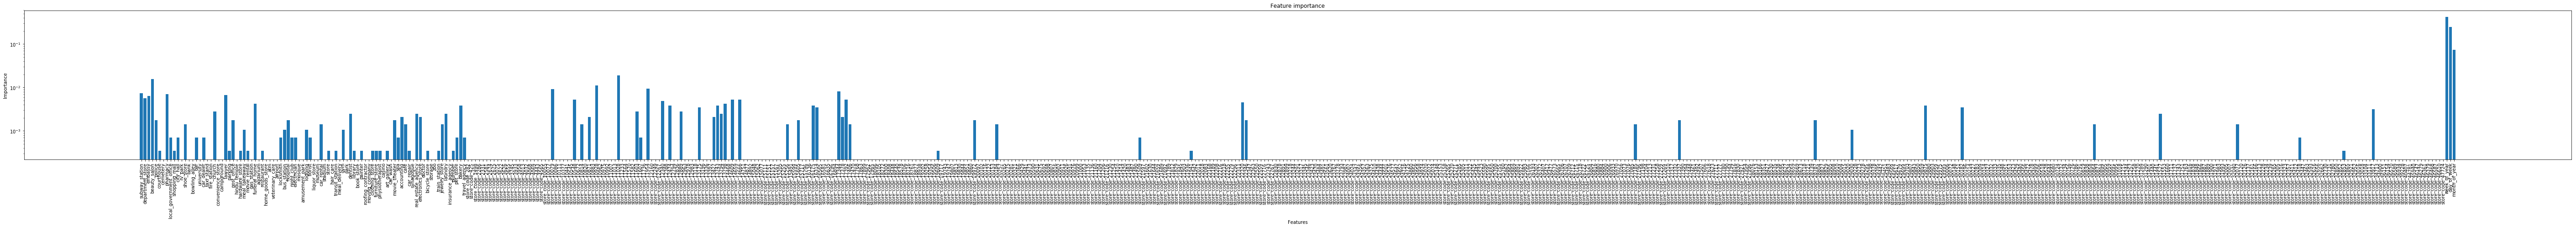

In [223]:
feature_importance = XGB_model.feature_importances_
plt.figure(figsize=(100, 6))
plt.yscale('log', nonposy='clip')
plt.bar(range(len(feature_importance)), feature_importance, align='center')
plt.xticks(range(len(feature_importance)), list(X_train.columns), rotation='vertical')
plt.title('Feature importance')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()

In [151]:
R_C = pd.DataFrame(data=[Ridge.coef_], columns=list(X_train.columns))

In [152]:
R_C

,subway_station,department_store,embassy,beauty_salon,police,courthouse,cemetery,pharmacy,local_government_office,shopping_mall,...,store_code_46279,store_code_46361,store_code_46379,store_code_46468,store_code_46587,store_code_46610,store_code_47724,week_of_year,day_of_week,month_of_year
0,34.646811,7.384217,-17.298099,-6.609083,-23.013802,30.440409,2.342713,8.959195,4.419386,4.576018,...,15.628406,-0.495213,13.191897,-222.908241,42.04037,-12.223185,11.296674,-0.846658,-2.007986,1.455337


##### (Please Double Click on the chart to zoom in)
#### In the chart below, the scale is linear.
#### While we can notice the difference in the impact created by the different surroundings on sales, this model relies more on the store features, notice how the coefficients can be positive or negative, this can give an idea on which features increase or decrease the sales

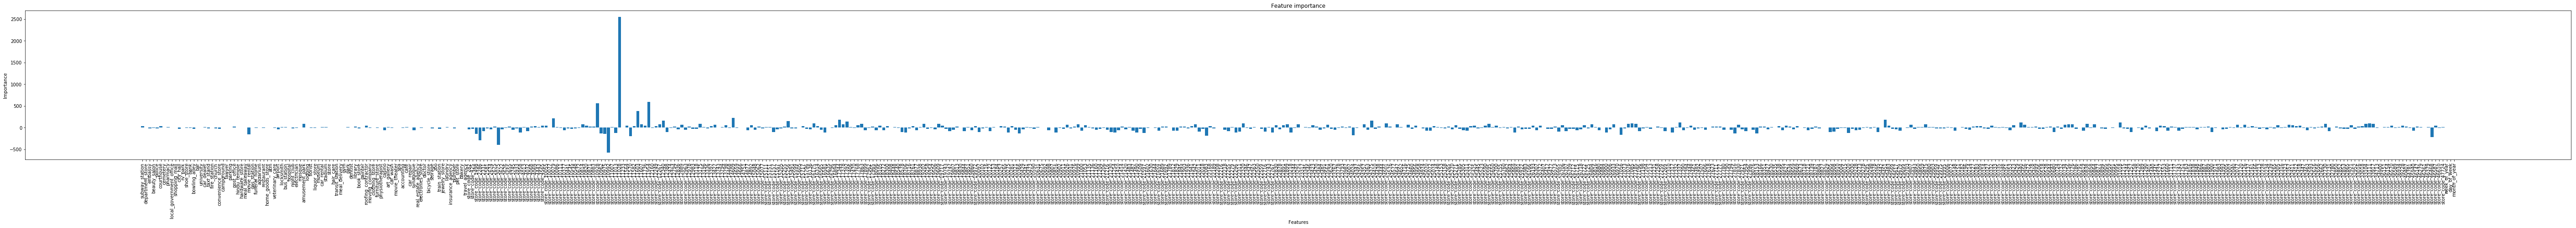

In [221]:
feature_importance = Ridge.coef_
plt.figure(figsize=(100, 6))
plt.yscale('linear', nonposy='clip')
plt.bar(range(len(feature_importance)), feature_importance, align='center')
plt.xticks(range(len(feature_importance)), list(X_train.columns), rotation='vertical')
plt.title('Feature importance')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()

### Let's try using only the surroundings features

In [158]:
data.head()

,store_code,subway_station,department_store,embassy,beauty_salon,police,courthouse,cemetery,pharmacy,local_government_office,...,train_station,jewelry_store,laundry,insurance_agency,plumber,pet_store,bakery,travel_agency,date_daily,sales
0,10055,0,0,0,4,0,0,0,3,0,...,0,0,1,2,0,0,3,1,2015-08-03,0.0
1,10055,0,0,0,4,0,0,0,3,0,...,0,0,1,2,0,0,3,1,2015-08-04,0.0
2,10055,0,0,0,4,0,0,0,3,0,...,0,0,1,2,0,0,3,1,2015-08-05,0.0
3,10055,0,0,0,4,0,0,0,3,0,...,0,0,1,2,0,0,3,1,2015-08-06,0.0
4,10055,0,0,0,4,0,0,0,3,0,...,0,0,1,2,0,0,3,1,2015-08-07,0.0


In [160]:
data_surr = data.drop(['store_code','date_daily'],1)

In [164]:
data_surr_Y = data_surr.sales
data_surr_X = data_surr.drop(['sales'],1)

In [165]:
X_train_surr, X_test_surr, y_train_surr, y_test_surr = train_test_split(data_surr_X, data_surr_Y, test_size=0.2)
print X_train_surr.shape, y_train_surr.shape
print X_test_surr.shape, y_test_surr.shape

(299376, 89) (299376,)
(74844, 89) (74844,)


In [166]:
Ridge_surr = linear_model.Ridge()
Ridge_surr.fit(X_train_surr, y_train_surr)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

#### Ridge Regression model is underfitting already.

In [169]:
Ridge_surr.score(X_train_surr, y_train_surr)

0.14476700315174662

In [173]:
XGB_model_surr = XGBRegressor(n_jobs=4)
XGB_model_surr.fit(X_train_surr, y_train_surr)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=4, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

#### XGB model is still performing decently

In [174]:
XGB_model_surr.score(X_train_surr, y_train_surr)

0.43144061402225814

In [175]:
XGB_model_surr.score(X_test_surr, y_test_surr)

0.4346930170675471

In [176]:
XGB_FI_surr = pd.DataFrame(data=[XGB_model_surr.feature_importances_], columns=list(X_train_surr.columns))

In [177]:
XGB_FI_surr

,subway_station,department_store,embassy,beauty_salon,police,courthouse,cemetery,pharmacy,local_government_office,shopping_mall,...,storage,zoo,train_station,jewelry_store,laundry,insurance_agency,plumber,pet_store,bakery,travel_agency
0,0.025518,0.106858,0.022329,0.068581,0.011164,0.001595,0.0,0.051037,0.049442,0.030303,...,0.007974,0.009569,0.0,0.009569,0.007974,0.004785,0.004785,0.017544,0.017544,0.00319


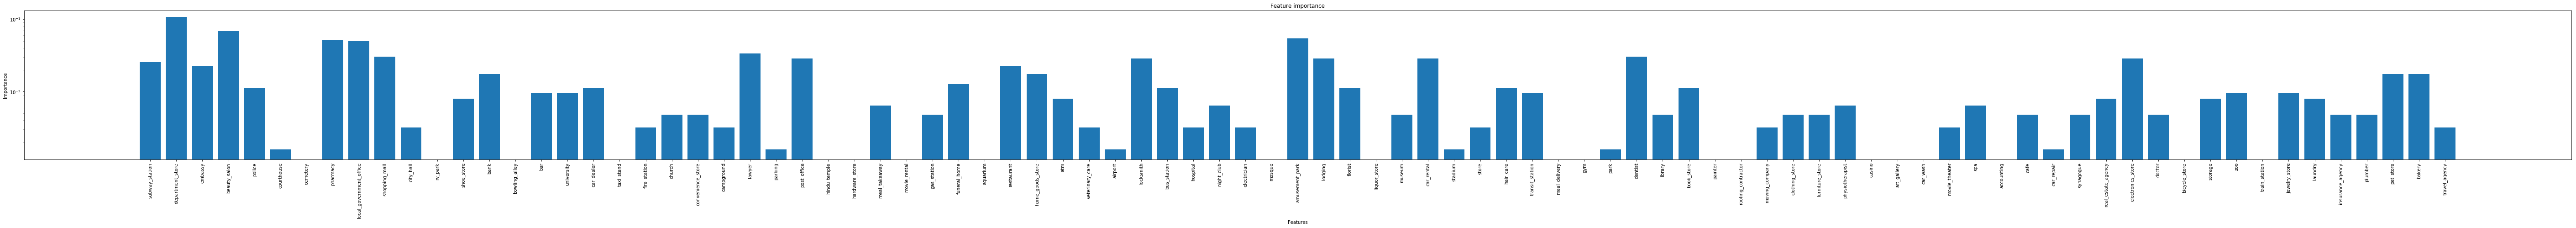

In [224]:
feature_importance = XGB_model_surr.feature_importances_
plt.figure(figsize=(100, 6))
plt.yscale('log', nonposy='clip')
plt.bar(range(len(feature_importance)), feature_importance, align='center')
plt.xticks(range(len(feature_importance)), list(X_train_surr.columns), rotation='vertical')
plt.title('Feature importance')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()

In [179]:
lm_surr = linear_model.LinearRegression()
lm_surr.fit(X_train_surr, y_train_surr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### Just like the Ridge regression, the Linear regression model is underfitting

In [180]:
lm_surr.score(X_test_surr, y_test_surr)

0.15094588675319476

In [181]:
lm_surr.score(X_train_surr, y_train_surr)

0.1447670079643678

#### Let's add the temporal feature

In [182]:
data_sd = data.drop(['store_code'],1)
data_sd['week_of_year'] = pd.to_datetime(data['date_daily']).dt.week
data_sd['day_of_week'] = pd.to_datetime(data['date_daily']).dt.dayofweek
data_sd['month_of_year'] = pd.to_datetime(data['date_daily']).dt.month
data_sd = data_sd.drop(['date_daily'],1)


In [183]:
data_sd_Y = data_sd.sales
data_sd_X = data_sd.drop(['sales'],1)

In [184]:
X_train_sd, X_test_sd, y_train_sd, y_test_sd = train_test_split(data_sd_X, data_sd_Y, test_size=0.2)
print X_train_sd.shape, y_train_sd.shape
print X_test_sd.shape, y_test_sd.shape

(299376, 92) (299376,)
(74844, 92) (74844,)


In [185]:
XGB_model_sd = XGBRegressor(n_jobs=4)
XGB_model_sd.fit(X_train_sd, y_train_sd)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=4, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

#### XGB performace improved after adding the temporal features

In [186]:
XGB_model_sd.score(X_train_sd, y_train_sd)

0.48284548721254217

In [187]:
XGB_model_sd.score(X_test_sd, y_test_sd)

0.4648800892606891

#### The regression models are still performing poorly.

In [188]:
Ridge_sd = linear_model.Ridge()
Ridge_sd.fit(X_train_sd, y_train_sd)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [189]:
Ridge_sd.score(X_train_sd, y_train_sd)

0.1474983653222688

In [190]:
Ridge_sd.score(X_test_sd, y_test_sd)

0.14386948691256574

In [191]:
lm_sd = linear_model.LinearRegression()
lm_sd.fit(X_train_sd, y_train_sd)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [193]:
lm_sd.score(X_test_sd, y_test_sd)

0.1451448229479294

In [194]:
lm_sd.score(X_train_sd, y_train_sd)

0.14637190528015231

In [195]:
XGB_FI_sd = pd.DataFrame(data=[XGB_model_sd.feature_importances_], columns=list(X_train_sd.columns))

In [196]:
XGB_FI_sd

,subway_station,department_store,embassy,beauty_salon,police,courthouse,cemetery,pharmacy,local_government_office,shopping_mall,...,jewelry_store,laundry,insurance_agency,plumber,pet_store,bakery,travel_agency,week_of_year,day_of_week,month_of_year
0,0.031429,0.065714,0.007143,0.027143,0.005714,0.001429,0.0,0.041429,0.058571,0.007143,...,0.011429,0.017143,0.001429,0.001429,0.01,0.008571,0.004286,0.084286,0.11,0.014286


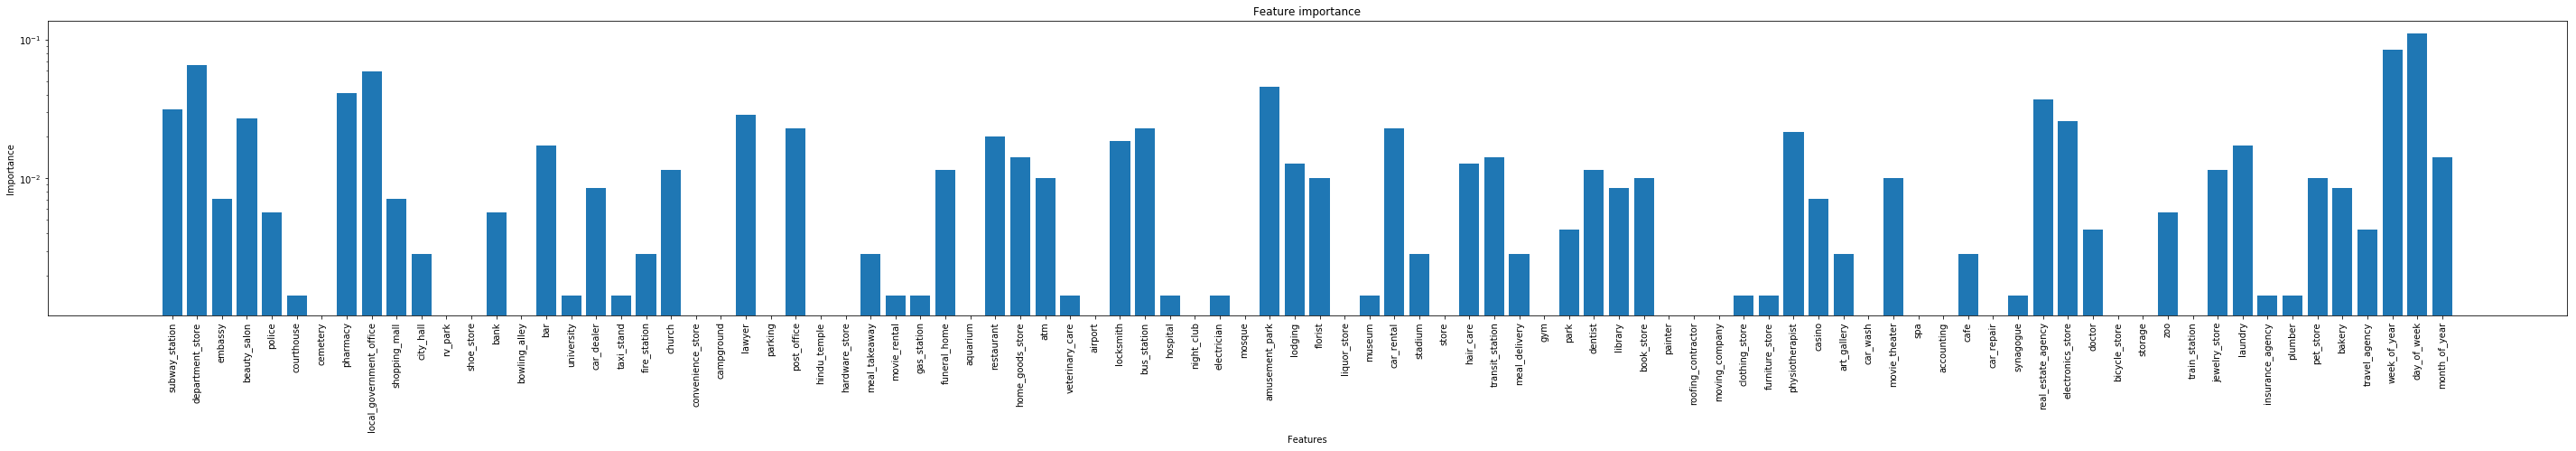

In [217]:
feature_importance = XGB_model_sd.feature_importances_
plt.figure(figsize=(50, 6))
plt.yscale('log', nonposy='clip')
plt.bar(range(len(feature_importance)), feature_importance, align='center')
plt.xticks(range(len(feature_importance)), list(X_train_sd.columns), rotation='vertical')
plt.title('Feature importance')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()

#### This is analysis is a starting point to begin answering the inital question.
#### There are a lot of ways to improve on this apprach:
    - Cross validation to improve the model performace.
    - Grid search to fine tune the model hyperparameters.
    - Fruther Feature Engineering: The surroundings data is very rich with many characteristics, exploring adding some of them not only would give us higher accuracy, but also would give a more details to the surroundings which impact sales the most(create score based on the rating for each surrounding entity for example, include more details about the specialty of each surrounding)
    - Based on the business needs, it's possible to aggregate to a more suitable date level (week, month, quarter ...)
    